In [4]:
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from load_cppimg import load_img,load_kspace
import scipy.fft as sfft
import re
%matplotlib inline

# path = '../exp_result_slow_1500_5x5/'
# path = '../exp_result_ssfp_fast/'
path = '../experiments/exp_ssfp_gz/'
exp_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
exp_folders.sort(key=lambda x: int(re.search(r'\d+', x).group()))
print("\n".join(exp_folders))

ID0_Speed_min0.0_max0.01


ID0_Speed_min0.0_max0.01


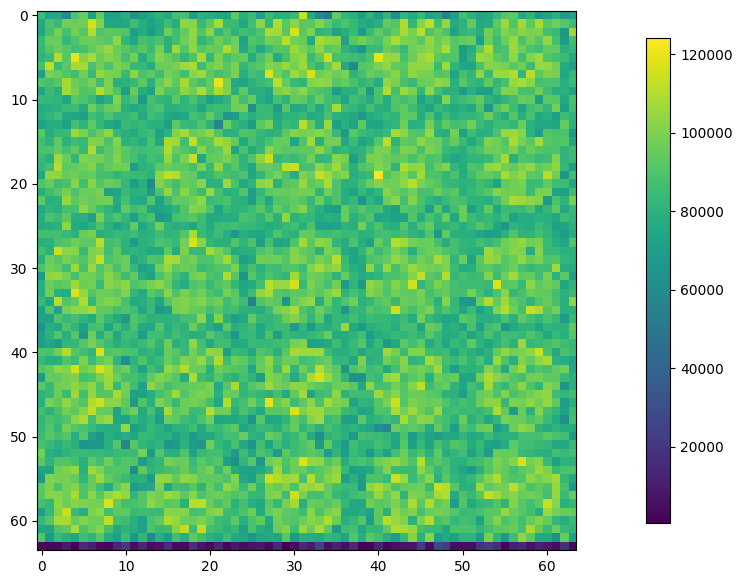

In [5]:
for exp in exp_folders:
    
    MOLLI_readout_img=[]
    for i in range(1):
        MOLLI_readout_img.append(load_img(os.path.join(path, exp),i))
    MOLLI_readout_img=np.asarray(MOLLI_readout_img)
    plt.figure(figsize=(18,7))
    print(exp)
    for i in range(1):
        # plt.subplot(2, 4, i+1)
        plt.imshow(MOLLI_readout_img[i])
        # plt.imshow(sfft.fftshift(MOLLI_readout_img[i]))
        
        # plt.imshow(np.abs(np.fft.ifft2(MOLLI_readout_img[i])))
        # plt.imshow(np.abs(sfft.fftshift(sfft.fft2(MOLLI_readout_img[i]))))
        plt.colorbar(shrink=0.9)
    plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

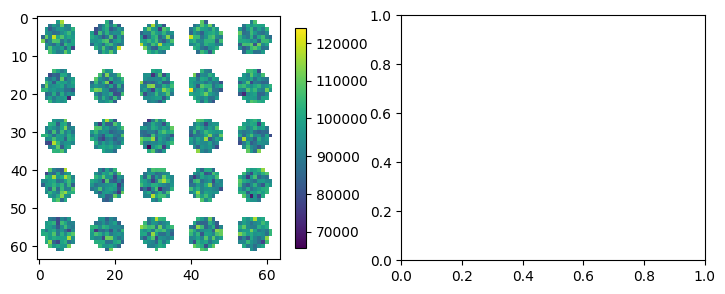

In [6]:
x=5
y=5
k=64
radius=18.0/256*64
dx=-1
dy=-1
mask = np.ones((k,k),dtype=bool)
for i in range(x):
    for j in range(y):
        for m in range(k):
            for n in range(k):
                if (m-(i+0.5)*k/x-dx)**2 + (n-(j+0.5)*k/y-dy)**2 < radius**2:
                    mask[m,n] = 0
plt.figure(figsize=(18,7))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(np.ma.masked_array(MOLLI_readout_img[i] , mask=mask))
    plt.colorbar(shrink=0.9)